In [74]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Import Plotting Libararies
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Model Evaluation Libraries
from sklearn.metrics import classification_report, confusion_matrix

In [75]:
#expanding the dispay of text sms column
pd.set_option('display.max_colwidth', -1)

dataset = pd.read_csv("sarcasm_dataset.csv")
dataset.head()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  


,Unnamed: 0,tweet,sarcastic,sarcasm,irony,satire,understatement,overstatement,rhetorical_question
0,0,The only thing I got from college is a caffeine addiction,1,0.0,1.0,0.0,0.0,0.0,0.0
1,1,I love it when professors draw a big question mark next to my answer on an exam because I’m always like yeah I don’t either ¯\_(ツ)_/¯,1,1.0,0.0,0.0,0.0,0.0,0.0
2,2,Remember the hundred emails from companies when Covid started getting real? I’ve gotten three in regards to support for protests. And only @SavageXFenty shared helpful links and actually said black lives matter... we love capitalism 🥰🙌🏼,1,0.0,1.0,0.0,0.0,0.0,0.0
3,3,Today my pop-pop told me I was not “forced” to go to college 🙃 okay sure sureeee,1,1.0,0.0,0.0,0.0,0.0,0.0
4,4,"@VolphanCarol @littlewhitty @mysticalmanatee I did too, and I also reported Cancun Cruz not worrying about the heartbeats of his constituents without electricity or heat when he fled to Mexico.",1,1.0,0.0,0.0,0.0,0.0,0.0


In [76]:

sarcasm = dataset.loc[dataset['sarcastic'] == 1]



In [77]:
pip install keras-utils

Note: you may need to restart the kernel to use updated packages.


In [78]:
pip install np_utils

Note: you may need to restart the kernel to use updated packages.


In [79]:
data = sarcasm.copy()

In [106]:
data.loc[:,'label'] = '0'

for i in range(len(data)):
    if(data.loc[i,'irony'] == 1.0):
        data.loc[i,'label'] = 0
    elif(data.loc[i,'satire'] == 1.0):
        data.loc[i,'label'] = 1
    elif(data.loc[i,'understatement'] == 1.0):
        data.loc[i,'label'] = 2
    elif(data.loc[i,'overstatement'] == 1.0):
        data.loc[i,'label'] = 3
    elif(data.loc[i,'rhetorical_question'] == 1.0):
        data.loc[i,'label'] = 4
    elif(data.loc[i,'sarcasm'] == 1.0):
        data.loc[i,'label'] = 5
    else:
        data.loc[i,'label'] = 6

In [109]:
# create dataset

data = data.dropna()
X = data['tweet']

Y = data['label']
print(X.shape)
print(Y.shape)
Y.unique()



(867,)
(867,)


array([0, 5, 4, 2, 1, 3], dtype=object)

In [110]:
df = data.drop_duplicates().groupby('label').count()
print(df)

       Unnamed: 0  tweet  sarcastic  sarcasm  irony  satire  understatement  \
label                                                                         
0      155         155    155        155      155    155     155              
1      21          21     21         21       21     21      21               
2      6           6      6          6        6      6       6                
3      31          31     31         31       31     31      31               
4      85          85     85         85       85     85      85               
5      569         569    569        569      569    569     569              

       overstatement  rhetorical_question  
label                                      
0      155            155                  
1      21             21                   
2      6              6                    
3      31             31                   
4      85             85                   
5      569            569                  


# Multiclass Classification using TFIDF vectors


In [111]:
# Machine Learning Models
from sklearn import svm  
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import Perceptron

In [112]:
def NB_classifier(train_vecs, y_train, test_vecs, y_test):
    # Training
    GB = GaussianNB()
    GB.fit(train_vecs, y_train)

    # testing
    test_predictionGB = GB.predict(test_vecs)
    return classification_report(test_predictionGB, y_test) , confusion_matrix(test_predictionGB, y_test)


In [113]:
def LR_classifier(train_vecs, y_train, test_vecs, y_test):
    # Training
    LR = LogisticRegression()
    LR.fit(train_vecs, y_train)

    # testing
    test_predictionLR = LR.predict(test_vecs)
    return classification_report(test_predictionLR, y_test) , confusion_matrix(test_predictionLR, y_test)



In [114]:
def RF_classifier(train_vecs, y_train, test_vecs, y_test):
    # Training
    RF = RandomForestClassifier(n_estimators = 450, max_depth=9, random_state=43)
    RF.fit(train_vecs, y_train)

    # Testing
    test_predictionRF = RF.predict( test_vecs )
    return classification_report(test_predictionRF, y_test), confusion_matrix(test_predictionRF, y_test)

In [115]:
def SVM_classifier(train_vecs, y_train, test_vecs, y_test):
    # Training
    SVM = svm.LinearSVC(max_iter=100)
    SVM.fit(train_vecs, y_train)

    # Testing
    test_predictionSVM = SVM.predict(test_vecs)
    return classification_report(test_predictionSVM, y_test), confusion_matrix(test_predictionSVM, y_test)

In [116]:
def Perceptron_classifier(train_vecs, y_train, test_vecs, y_test):

    # Training
    Per = Perceptron(tol=1e-3, random_state=0)
    Per.fit(train_vecs, y_train)

    # Testing
    test_predictionPer = Per.predict(test_vecs)
    return classification_report(test_predictionPer, y_test), confusion_matrix(test_predictionPer, y_test)


# Results

In [129]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
#import warnings

from sklearn.feature_extraction.text import CountVectorizer

In [118]:

max_feature_num = 3468
vectorizer = TfidfVectorizer(max_features=max_feature_num)
features = vectorizer.fit_transform(X)
y = Y.astype('int')
X_train, X_test, y_train, y_test,indices_train,indices_test = train_test_split(features, 
                                                               y, 
                                                               X.index, test_size=0.25, 
                                                               random_state=1)



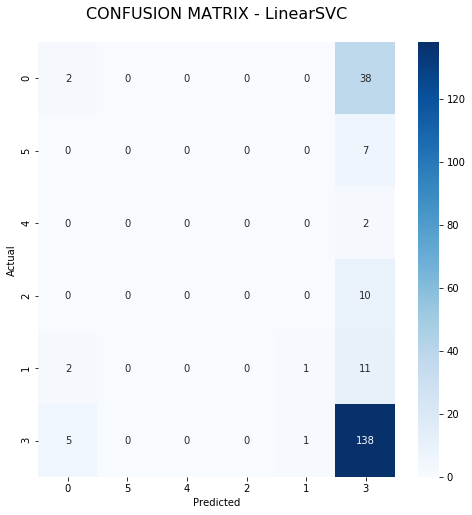

In [119]:
model = LinearSVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(conf_mat, annot=True, cmap="Blues", fmt='d',
            xticklabels=Y.unique(), 
            yticklabels=Y.unique())
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("CONFUSION MATRIX - LinearSVC\n", size=16);

In [121]:
class_report , conf_matrix = SVM_classifier(X_train, y_train, X_test, y_test)
print('Results of SVM CLASSIFIER on TF-IDF Vectorizer\n')
print(class_report)
print(conf_matrix)

Results of SVM CLASSIFIER on TF-IDF Vectorizer

              precision    recall  f1-score   support

           0       0.05      0.22      0.08         9
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.07      0.50      0.12         2
           5       0.96      0.67      0.79       206

    accuracy                           0.65       217
   macro avg       0.18      0.23      0.17       217
weighted avg       0.91      0.65      0.75       217

[[  2   0   0   0   2   5]
 [  0   0   0   0   0   0]
 [  0   0   0   0   0   0]
 [  0   0   0   0   0   0]
 [  0   0   0   0   1   1]
 [ 38   7   2  10  11 138]]


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [124]:
class_report , conf_matrix = LR_classifier(X_train, y_train, X_test, y_test)
print('Results of Logistic Regression Classifier on TF-IDF Vectorizer\n')
print(class_report)
print(conf_matrix)

Results of Logistic Regression Classifier on TF-IDF Vectorizer

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       1.00      0.66      0.80       217

    accuracy                           0.66       217
   macro avg       0.17      0.11      0.13       217
weighted avg       1.00      0.66      0.80       217

[[  0   0   0   0   0   0]
 [  0   0   0   0   0   0]
 [  0   0   0   0   0   0]
 [  0   0   0   0   0   0]
 [  0   0   0   0   0   0]
 [ 40   7   2  10  14 144]]


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [125]:
class_report , conf_matrix = RF_classifier(X_train, y_train, X_test, y_test)
print('Results of  Random Forest on TF-IDF Vectorizer\n')
print(class_report)
print(conf_matrix)

Results of  Random Forest on TF-IDF Vectorizer

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       1.00      0.66      0.80       217

    accuracy                           0.66       217
   macro avg       0.17      0.11      0.13       217
weighted avg       1.00      0.66      0.80       217

[[  0   0   0   0   0   0]
 [  0   0   0   0   0   0]
 [  0   0   0   0   0   0]
 [  0   0   0   0   0   0]
 [  0   0   0   0   0   0]
 [ 40   7   2  10  14 144]]


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [126]:
class_report , conf_matrix = NB_classifier(X_train.todense(), y_train, X_test.todense(), y_test)
print('Results of Naive Bayes Classifier on TF-IDF Vectorizer\n')
print(class_report)
print(conf_matrix)

Results of Naive Bayes Classifier on TF-IDF Vectorizer

              precision    recall  f1-score   support

           0       0.12      0.23      0.16        22
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         2
           4       0.21      0.25      0.23        12
           5       0.84      0.68      0.75       179

    accuracy                           0.59       217
   macro avg       0.20      0.19      0.19       217
weighted avg       0.72      0.59      0.65       217

[[  5   1   0   2   0  14]
 [  0   0   0   0   0   1]
 [  0   0   0   0   0   1]
 [  0   0   0   0   0   2]
 [  4   0   0   0   3   5]
 [ 31   6   2   8  11 121]]


In [132]:
class_report , conf_matrix = Perceptron_classifier(X_train, y_train, X_test, y_test)
print('Results of Perceptron Classifier on TF-IDF Vectorizer\n')
print(class_report)
print(conf_matrix)

Results of Perceptron Classifier on TF-IDF Vectorizer

              precision    recall  f1-score   support

           0       0.15      0.24      0.18        25
           1       0.00      0.00      0.00         7
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         2
           4       0.36      0.22      0.27        23
           5       0.76      0.70      0.73       158

    accuracy                           0.56       217
   macro avg       0.21      0.19      0.20       217
weighted avg       0.61      0.56      0.58       217

[[  6   1   0   1   1  16]
 [  2   0   0   0   0   5]
 [  0   0   0   0   0   2]
 [  1   0   0   0   0   1]
 [  5   1   1   1   5  10]
 [ 26   5   1   8   8 110]]


# # Multiclass Classification using BOW


In [133]:
vectorizer = CountVectorizer(binary=False,ngram_range=(1,1))
features = vectorizer.fit_transform(X)
y = Y.astype('int')
X_train, X_test, y_train, y_test,indices_train,indices_test = train_test_split(features, 
                                                               y, 
                                                               X.index, test_size=0.25, 
                                                               random_state=1)


In [168]:
class_report , conf_matrix = SVM_classifier(X_train, y_train, X_test, y_test)
print('Results of SVM CLASSIFIER on BOW\n')
print(class_report)
print(conf_matrix)

Results of SVM CLASSIFIER on BOW

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       1.00      0.66      0.80       217

    accuracy                           0.66       217
   macro avg       0.17      0.11      0.13       217
weighted avg       1.00      0.66      0.80       217

[[  0   0   0   0   0   0]
 [  0   0   0   0   0   0]
 [  0   0   0   0   0   0]
 [  0   0   0   0   0   0]
 [  0   0   0   0   0   0]
 [ 40   7   2  10  14 144]]


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [169]:
class_report , conf_matrix = LR_classifier(X_train, y_train, X_test, y_test)
print('Results of Logistic Regression Classifier on BOW\n')
print(class_report)
print(conf_matrix)

Results of Logistic Regression Classifier on BOW

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       1.00      0.66      0.80       217

    accuracy                           0.66       217
   macro avg       0.17      0.11      0.13       217
weighted avg       1.00      0.66      0.80       217

[[  0   0   0   0   0   0]
 [  0   0   0   0   0   0]
 [  0   0   0   0   0   0]
 [  0   0   0   0   0   0]
 [  0   0   0   0   0   0]
 [ 40   7   2  10  14 144]]


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [170]:
class_report , conf_matrix = RF_classifier(X_train, y_train, X_test, y_test)
print('Results of  Random Forest on BOW\n')
print(class_report)
print(conf_matrix)

Results of  Random Forest on BOW

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       1.00      0.66      0.80       217

    accuracy                           0.66       217
   macro avg       0.17      0.11      0.13       217
weighted avg       1.00      0.66      0.80       217

[[  0   0   0   0   0   0]
 [  0   0   0   0   0   0]
 [  0   0   0   0   0   0]
 [  0   0   0   0   0   0]
 [  0   0   0   0   0   0]
 [ 40   7   2  10  14 144]]


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [171]:
class_report , conf_matrix = NB_classifier(X_train.todense(), y_train, X_test.todense(), y_test)
print('Results of Naive Bayes Classifier on BOW\n')
print(class_report)
print(conf_matrix)

Results of Naive Bayes Classifier on BOW

              precision    recall  f1-score   support

           0       0.07      0.25      0.12        12
           1       0.00      0.00      0.00         1
           2       1.00      0.01      0.02       158
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         3
           5       0.17      0.61      0.27        41

    accuracy                           0.14       217
   macro avg       0.21      0.15      0.07       217
weighted avg       0.77      0.14      0.08       217

[[  3   1   0   1   1   6]
 [  0   0   0   0   0   1]
 [ 28   3   2   7  11 107]
 [  0   0   0   0   0   2]
 [  0   0   0   0   0   3]
 [  9   3   0   2   2  25]]


In [172]:
class_report , conf_matrix = Perceptron_classifier(X_train, y_train, X_test, y_test)
print('Results of Perceptron Classifier on BOW\n')
print(class_report)
print(conf_matrix)

Results of Perceptron Classifier on BOW

              precision    recall  f1-score   support

           0       0.07      0.38      0.12         8
           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         3
           5       0.92      0.66      0.77       202

    accuracy                           0.63       217
   macro avg       0.17      0.17      0.15       217
weighted avg       0.86      0.63      0.72       217

[[  3   1   0   0   0   4]
 [  0   0   0   0   0   2]
 [  0   0   0   0   0   0]
 [  0   0   0   0   0   2]
 [  0   0   0   0   0   3]
 [ 37   6   2  10  14 133]]


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# # Multiclass Classification using Bigram/Trigram

In [173]:
vectorizer = CountVectorizer(binary=False,ngram_range=(2,2))
features = vectorizer.fit_transform(X)
y = Y.astype('int')
X_train, X_test, y_train, y_test,indices_train,indices_test = train_test_split(features, 
                                                               y, 
                                                               X.index, test_size=0.25, 
                                                               random_state=1)

In [174]:
class_report , conf_matrix = SVM_classifier(X_train, y_train, X_test, y_test)
print('Results of SVM CLASSIFIER on Bi-gram\n')
print(class_report)
print(conf_matrix)

Results of SVM CLASSIFIER on Bi-gram

              precision    recall  f1-score   support

           0       0.03      0.33      0.05         3
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         1
           5       0.99      0.67      0.80       213

    accuracy                           0.66       217
   macro avg       0.17      0.17      0.14       217
weighted avg       0.98      0.66      0.79       217

[[  1   1   0   0   0   1]
 [  0   0   0   0   0   0]
 [  0   0   0   0   0   0]
 [  0   0   0   0   0   0]
 [  1   0   0   0   0   0]
 [ 38   6   2  10  14 143]]


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [175]:
class_report , conf_matrix = LR_classifier(X_train, y_train, X_test, y_test)
print('Results of Logistic Regression Classifier on Bi-gram\n')
print(class_report)
print(conf_matrix)

Results of Logistic Regression Classifier on Bi-gram

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         1
           5       1.00      0.67      0.80       216

    accuracy                           0.66       217
   macro avg       0.17      0.11      0.13       217
weighted avg       1.00      0.66      0.80       217

[[  0   0   0   0   0   0]
 [  0   0   0   0   0   0]
 [  0   0   0   0   0   0]
 [  0   0   0   0   0   0]
 [  1   0   0   0   0   0]
 [ 39   7   2  10  14 144]]


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [185]:
class_report , conf_matrix = RF_classifier(X_train, y_train, X_test, y_test)
print('Results of  Random Forest on Bi-gram\n')
print(class_report)
print(conf_matrix)

Results of  Random Forest on Bi-gram

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       1.00      0.66      0.80       217

    accuracy                           0.66       217
   macro avg       0.17      0.11      0.13       217
weighted avg       1.00      0.66      0.80       217

[[  0   0   0   0   0   0]
 [  0   0   0   0   0   0]
 [  0   0   0   0   0   0]
 [  0   0   0   0   0   0]
 [  0   0   0   0   0   0]
 [ 40   7   2  10  14 144]]


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [177]:
class_report , conf_matrix = NB_classifier(X_train.todense(), y_train, X_test.todense(), y_test)
print('Results of Naive Bayes Classifier on Bi-gram\n')
print(class_report)
print(conf_matrix)

Results of Naive Bayes Classifier on Bi-gram

              precision    recall  f1-score   support

           0       0.15      0.17      0.16        36
           1       0.00      0.00      0.00         5
           2       0.00      0.00      0.00        24
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00        14
           5       0.62      0.67      0.65       134

    accuracy                           0.44       217
   macro avg       0.13      0.14      0.13       217
weighted avg       0.41      0.44      0.43       217

[[ 6  2  1  3  2 22]
 [ 0  0  0  0  0  5]
 [ 5  0  0  2  2 15]
 [ 2  0  0  0  0  2]
 [ 1  0  1  2  0 10]
 [26  5  0  3 10 90]]


In [178]:
class_report , conf_matrix = Perceptron_classifier(X_train, y_train, X_test, y_test)
print('Results of Perceptron Classifier on Bi-gram\n')
print(class_report)
print(conf_matrix)

Results of Perceptron Classifier on Bi-gram

              precision    recall  f1-score   support

           0       0.15      0.30      0.20        20
           1       0.14      0.14      0.14         7
           2       0.00      0.00      0.00        19
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        13
           5       0.74      0.68      0.71       157

    accuracy                           0.53       217
   macro avg       0.17      0.19      0.18       217
weighted avg       0.56      0.53      0.54       217

[[  6   1   1   0   2  10]
 [  1   1   0   0   0   5]
 [  3   2   0   3   1  10]
 [  0   0   0   0   0   1]
 [  1   0   0   1   0  11]
 [ 29   3   1   6  11 107]]


In [179]:
vectorizer = CountVectorizer(binary=False,ngram_range=(3,3))
features = vectorizer.fit_transform(X)
y = Y.astype('int')
X_train, X_test, y_train, y_test,indices_train,indices_test = train_test_split(features, 
                                                               y, 
                                                               X.index, test_size=0.25, 
                                                               random_state=1)

In [180]:
class_report , conf_matrix = SVM_classifier(X_train, y_train, X_test, y_test)
print('Results of SVM CLASSIFIER on Tri-gram\n')
print(class_report)
print(conf_matrix)

Results of SVM CLASSIFIER on Tri-gram

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       1.00      0.66      0.80       217

    accuracy                           0.66       217
   macro avg       0.17      0.11      0.13       217
weighted avg       1.00      0.66      0.80       217

[[  0   0   0   0   0   0]
 [  0   0   0   0   0   0]
 [  0   0   0   0   0   0]
 [  0   0   0   0   0   0]
 [  0   0   0   0   0   0]
 [ 40   7   2  10  14 144]]


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [181]:
class_report , conf_matrix = LR_classifier(X_train, y_train, X_test, y_test)
print('Results of Logistic Regression Classifier on Tri-gram\n')
print(class_report)
print(conf_matrix)

Results of Logistic Regression Classifier on Tri-gram

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       1.00      0.66      0.80       217

    accuracy                           0.66       217
   macro avg       0.17      0.11      0.13       217
weighted avg       1.00      0.66      0.80       217

[[  0   0   0   0   0   0]
 [  0   0   0   0   0   0]
 [  0   0   0   0   0   0]
 [  0   0   0   0   0   0]
 [  0   0   0   0   0   0]
 [ 40   7   2  10  14 144]]


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [182]:
class_report , conf_matrix = RF_classifier(X_train, y_train, X_test, y_test)
print('Results of  Random Forest on Tri-gram\n')
print(class_report)
print(conf_matrix)

Results of  Random Forest on Tri-gram

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       1.00      0.66      0.80       217

    accuracy                           0.66       217
   macro avg       0.17      0.11      0.13       217
weighted avg       1.00      0.66      0.80       217

[[  0   0   0   0   0   0]
 [  0   0   0   0   0   0]
 [  0   0   0   0   0   0]
 [  0   0   0   0   0   0]
 [  0   0   0   0   0   0]
 [ 40   7   2  10  14 144]]


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [183]:
class_report , conf_matrix = NB_classifier(X_train.todense(), y_train, X_test.todense(), y_test)
print('Results of Naive Bayes Classifier on Tri-gram\n')
print(class_report)
print(conf_matrix)

Results of Naive Bayes Classifier on Tri-gram

              precision    recall  f1-score   support

           0       0.07      0.25      0.12        12
           1       0.00      0.00      0.00         1
           2       1.00      0.01      0.02       158
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         3
           5       0.17      0.61      0.27        41

    accuracy                           0.14       217
   macro avg       0.21      0.15      0.07       217
weighted avg       0.77      0.14      0.08       217

[[  3   1   0   1   1   6]
 [  0   0   0   0   0   1]
 [ 28   3   2   7  11 107]
 [  0   0   0   0   0   2]
 [  0   0   0   0   0   3]
 [  9   3   0   2   2  25]]


In [184]:
class_report , conf_matrix = Perceptron_classifier(X_train, y_train, X_test, y_test)
print('Results of Perceptron Classifier on Tri-gram\n')
print(class_report)
print(conf_matrix)

Results of Perceptron Classifier on Tri-gram

              precision    recall  f1-score   support

           0       0.07      0.38      0.12         8
           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         3
           5       0.92      0.66      0.77       202

    accuracy                           0.63       217
   macro avg       0.17      0.17      0.15       217
weighted avg       0.86      0.63      0.72       217

[[  3   1   0   0   0   4]
 [  0   0   0   0   0   2]
 [  0   0   0   0   0   0]
 [  0   0   0   0   0   2]
 [  0   0   0   0   0   3]
 [ 37   6   2  10  14 133]]


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
